# CRISP DM

In [ ]:
Bussines Understanding

- Problem
 sebuah perusahaan  e-commerce yang menjual produk elektronik sering ditanya oleh konsumen apakah 
 paket akan tiba tepat waktu atau tidak. masalah nya e-commerce tersebut tidak memiliki tools 
 atau alat untuk mengetahui tiba nya paket tersebut. 

- Tujuan
Dataset ini diambil dari Kaggle (https://www.kaggle.com/datasets/prachi13/customer-analytics)
bertujuan untuk menganalisis, Dan memprediksi paket yang di pesan 
 oleh konsumen apakah tiba tepat waktu atau tidak. di harapkan dengan adanya model ini 
 dapat membantu e-commerce tersebut dalam menentukan kedatangan paket kepada konsumen. 

In [ ]:
Data Understanding
 0   ID               = id konsumen   
 1   Warehouse_block   = Perusahaan memiliki Gudang besar yang dibagi menjadi beberapah blok 
 2   Mode_of_Shipment   = Perusahaan Mengirimkan produk dengan berbagai cara seperti Laut,darat,udara  
 3   Customer_care_calls = Jumlah panggilan yang dilakukan oleh konsumen untuk menanyakan pengiriman. 
 4   Customer_rating     = penilaian dari konsumen ke perusahaan e-commerce 
 5   Cost_of_the_Product  = harga produk dalam usd
 6   Prior_purchases      = jumlah transaksi sebelumnya
 7   Product_importance   = Tingkat kepentingan produk 
 8   Gender                = jenis kelamin 
 9   Discount_offered      = Diskon yang ditawarkan pada produk tertentu.
 10  Weight_in_gms         = berat produk dalam gram
 11  Reached.on.Time_Y.N   = kedatangan barang tepat waktu atau tidak


In [ ]:
Data Preparation

Yang dijadikan sebagai fitur adalah: 
              
     Warehouse_block  
     Mode_of_Shipment     
     Customer_care_calls 
     Customer_rating     
     Cost_of_the_Product  
     Prior_purchases      
     Product_importance               
     Discount_offered      
     Weight_in_gms         
    

   

Sedangkan, yang menjadi target yaitu  Reached.on.Time_Y.N   

# Import library

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Train.csv")

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

# Transformasi Data

In [6]:
# memisahkan numerik dan kategori
numerik = []
kategori = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerik.append(col)
    else:
        kategori.append(col)

for col in df.columns:
    if col in numerik:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in kategori:
    df[col] = le.fit_transform(df[col])

In [8]:
df['Reached.on.Time_Y.N'] = le.fit_transform(df['Reached.on.Time_Y.N'])

In [9]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [10]:
df.to_csv('E-Commerce.csv')

In [12]:
df['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

# Visualisasi Data

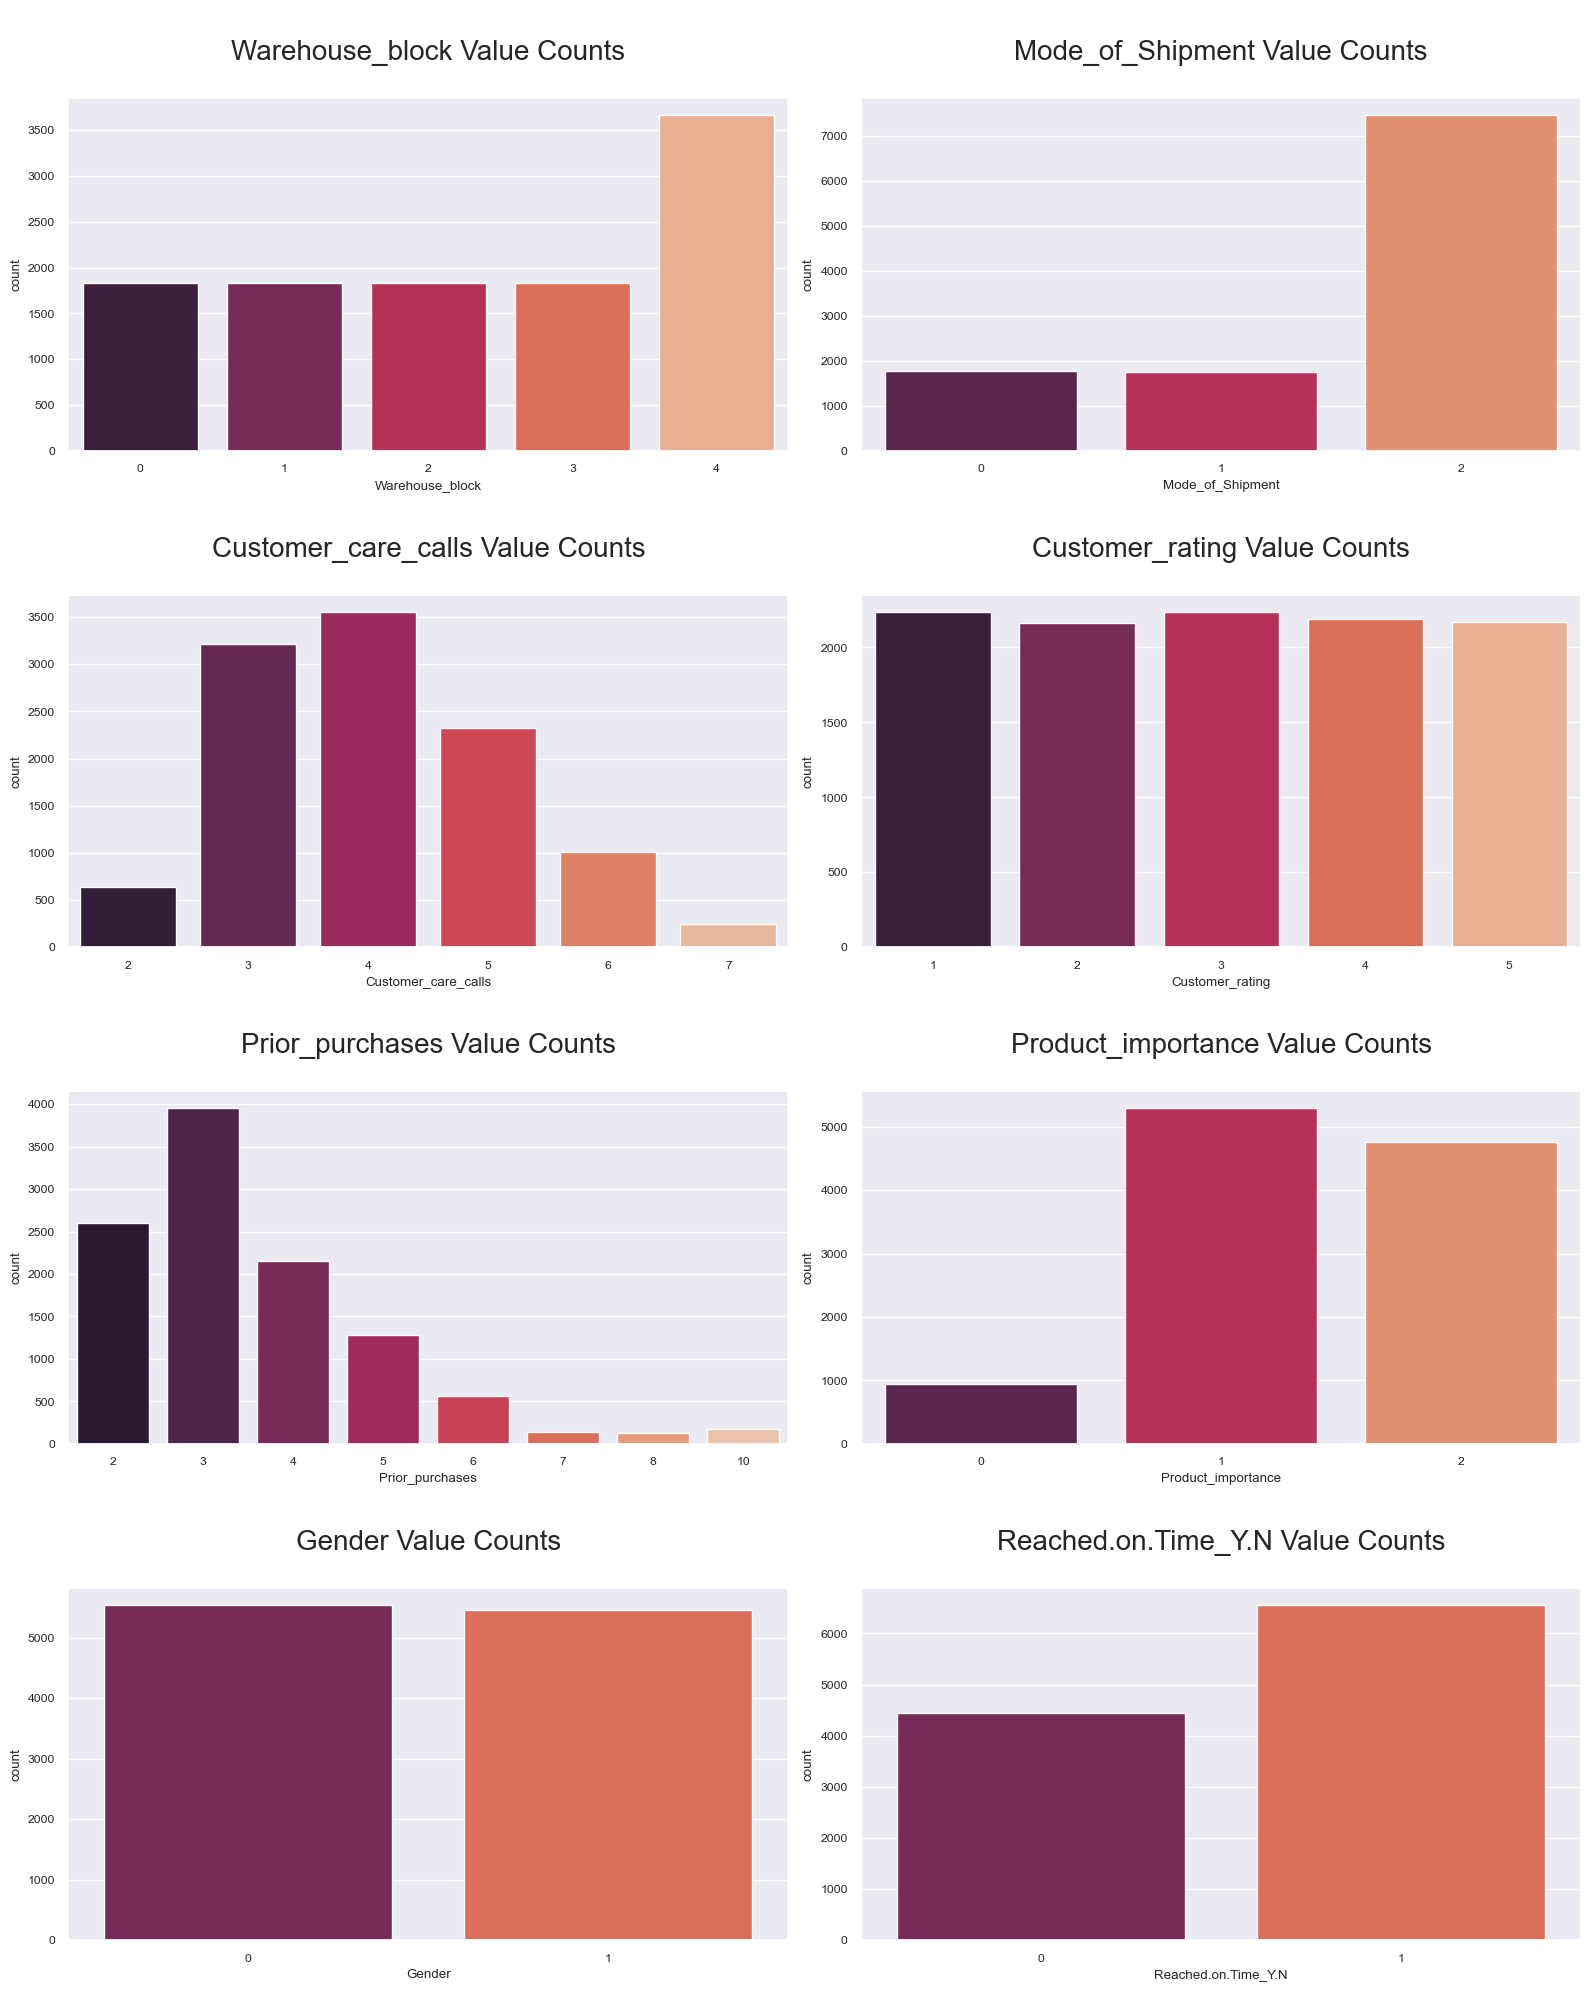

In [39]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

# Split data

In [14]:
X = df.drop(columns=['ID', 'Gender' ,'Reached.on.Time_Y.N'], axis=1)
Y = df['Reached.on.Time_Y.N']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, x_train.shape, x_test.shape)

(10999, 9) (8799, 9) (2200, 9)


# Membuat model training

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [28]:
model = knn.fit(x_train, y_train)

# Evaluasi model

In [29]:
x_train_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predict, y_train)

In [30]:
print('Akurasi data training : ', training_data_accuracy)

Akurasi data training :  0.8221388794181157


In [31]:
x_test_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predict, y_test)

In [32]:
print('Akurasi data testing : ', test_data_accuracy)

Akurasi data testing :  0.644090909090909


# Model Prediksi

In [36]:
input_data = (0,2,3,3,173,5,2,10,5840)
input_data_numpy = np.asarray(input_data)
data_reshaped = input_data_numpy.reshape(1, -1)
prediksi= model.predict(data_reshaped)
print(prediksi)

if (prediksi[0] == 0):
    print('paket ini datang tepat waktu')
else:
    print('paket ini datang terlambat')

[0]
paket ini datang tepat waktu


C:\Users\zaiim\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# Save Model

In [37]:
import pickle

filename = 'ekspedisi.sav'
pickle.dump(model, open(filename, 'wb'))